# Adult Salary Prediction 

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
salary_data = pd.read_csv('salary_data.csv')
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
salary_data.shape

(32561, 15)

In [97]:
salary_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

salary_data.columns = ['age', 'workclass', ' fnlwgt', ' education', ' education_num',
       ' marital_status', ' occupation', ' relationship', ' race', ' sex',
       ' capital_gain', 'capital_loss', ' hours_per_week', ' native_country',
       ' salary']

In [98]:
salary_data.columns = salary_data.columns.str.strip().str.replace("-", "_").str.lower()
salary_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

(0         2174
 1            0
 2            0
 3            0
 4            0
          ...  
 32556        0
 32557        0
 32558        0
 32559        0
 32560    15024
 Name: capital_gain, Length: 32561, dtype: int64,
 <seaborn.axisgrid.FacetGrid at 0x1b4edad8fa0>)

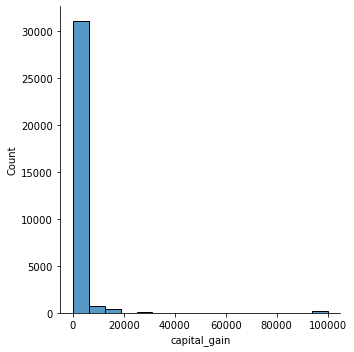

In [99]:
salary_data['capital_gain'], sns.displot(salary_data.capital_gain)

In [100]:
salary_data.capital_gain = np.where(salary_data.capital_gain == 0, np.nan, salary_data.capital_gain)
salary_data.capital_gain

0         2174.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
32556        NaN
32557        NaN
32558        NaN
32559        NaN
32560    15024.0
Name: capital_gain, Length: 32561, dtype: float64

In [101]:
salary_data.capital_gain = np.log(salary_data.capital_gain)
salary_data.capital_gain

0        7.684324
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
32556         NaN
32557         NaN
32558         NaN
32559         NaN
32560    9.617404
Name: capital_gain, Length: 32561, dtype: float64

In [102]:
salary_data.capital_gain = salary_data.capital_gain.replace(np.nan, 0)
salary_data.capital_gain

0        7.684324
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617404
Name: capital_gain, Length: 32561, dtype: float64

In [103]:
salary_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


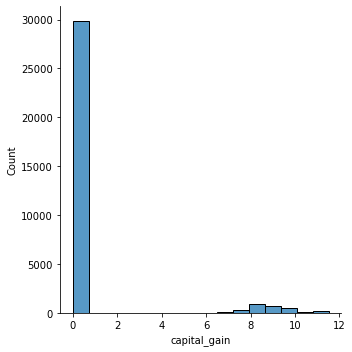

In [104]:
sns.displot(salary_data.capital_gain)

In [105]:
salary_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [106]:
salary_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [107]:
salary_data.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

# Removing outliers from hours_per_week column


In [108]:
salary_data.hours_per_week

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours_per_week, Length: 32561, dtype: int64

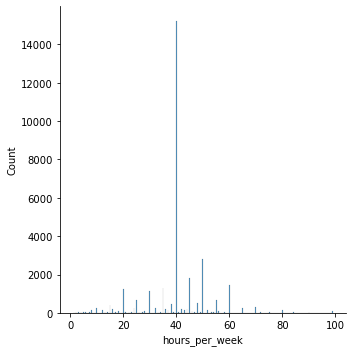

In [109]:
sns.displot(salary_data, x = 'hours_per_week')

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

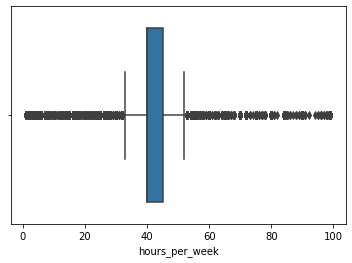

In [110]:
sns.boxplot(salary_data.hours_per_week)

In [118]:
salary_data.hours_per_week.quantile(0.75), salary_data.hours_per_week.quantile(0.25)

(45.0, 40.0)

In [119]:
salary_data.hours_per_week.quantile([0.25, 0.75])

0.25    40.0
0.75    45.0
Name: hours_per_week, dtype: float64

In [112]:
IQR = salary_data.hours_per_week.quantile(0.75) - salary_data.hours_per_week.quantile(0.25)
IQR

5.0

In [113]:
lower_range = salary_data.hours_per_week.quantile(0.25) - (1.5 * IQR)
upper_range = salary_data.hours_per_week.quantile(0.75) + (1.5 * IQR)

lower_range, upper_range

(32.5, 52.5)

In [114]:
salary_data.loc[salary_data.hours_per_week <= lower_range, 'hours_per_week'] = lower_range

In [115]:
salary_data.loc[salary_data.hours_per_week >= upper_range, 'hours_per_week'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

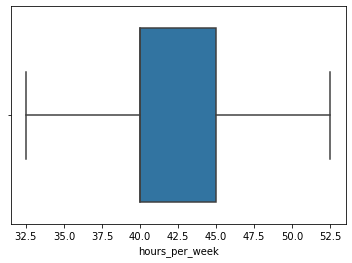

In [116]:
sns.boxplot(salary_data.hours_per_week)


# Removing outliers from education_num

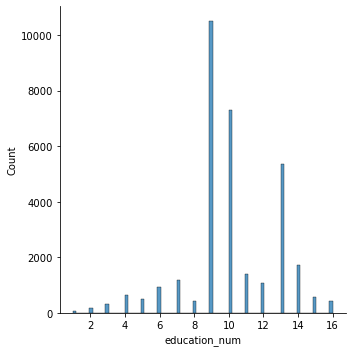

In [125]:
sns.displot(salary_data['education_num'])

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

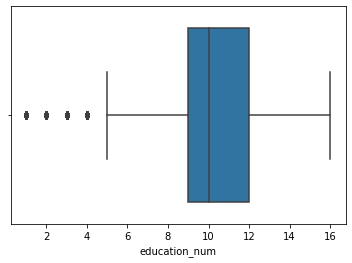

In [126]:
sns.boxplot(salary_data.education_num)

In [129]:
IQR = salary_data['education_num'].quantile(0.75) - salary_data['education_num'].quantile(0.25)
    
lower_range = salary_data['education_num'].quantile(0.25) - (1.5 * IQR)
upper_range = salary_data['education_num'].quantile(0.75) + (1.5 * IQR)
    
salary_data.loc[salary_data['education_num'] <= lower_range, 'education_num'] = lower_range
salary_data.loc[salary_data['education_num'] >= upper_range, 'education_num'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

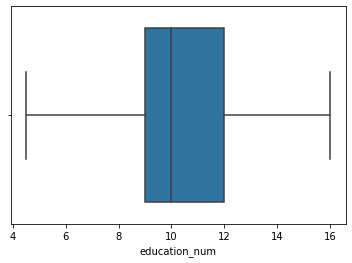

In [131]:
sns.boxplot(salary_data.education_num)